In [1]:
from img_doc.document import Document
from img_doc.dataset import PubLayNetDataset
import matplotlib.pyplot as plt

2024-03-01 16:23:53.003798: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 16:23:53.032851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 16:23:53.032876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 16:23:53.033644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 16:23:53.038220: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 16:23:53.038677: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
pln_ds = PubLayNetDataset(r"/home/daniil/program/dataset/publaynet/", 
                          r"/home/daniil/program/dataset/tmp_publaynet/")

In [3]:
list_file = pln_ds.get_list_file_name()
list_file[:5]

['PMC3437971_00001.jpg',
 'PMC4631444_00001.jpg',
 'PMC5486610_00004.jpg',
 'PMC4422455_00003.jpg',
 'PMC5831887_00003.jpg']

In [4]:
doc = pln_ds.read_file(list_file[2])
page = doc.pages[0]

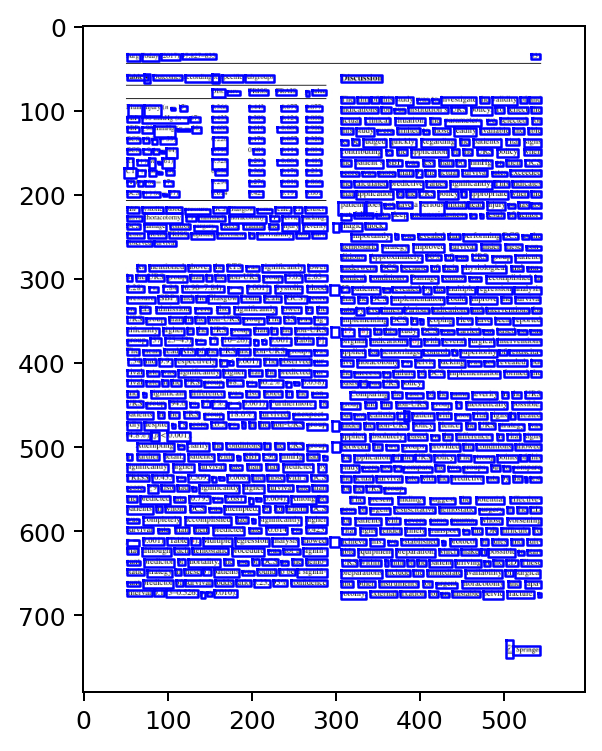

In [5]:
plt.figure(dpi=180)

page.image.plot()
for word in page.words:
    word.segment.plot()

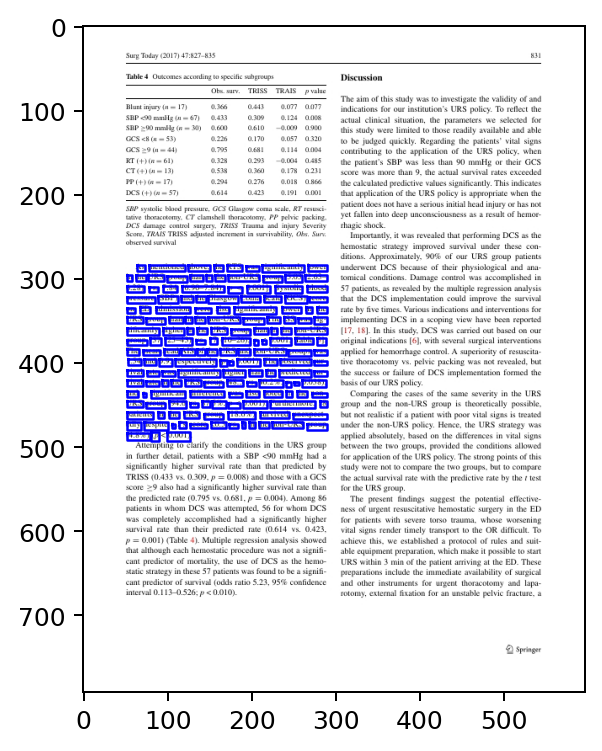

In [6]:
plt.figure(dpi=180)

page.image.plot()
for word in page.blocks[0].words:
    word.segment.plot()

In [7]:
from img_doc.document.page.extractors.block_extractors import PageAndWordClassificator, BaseRandomWalkClassificator

In [12]:
brwc = BaseRandomWalkClassificator(conf={"properties":["many_dist", "many_angle", "place_in_block"],"count_step":2})
pwc = PageAndWordClassificator(brwc, conf={"properties":["place_in_page", "count_word_in_page"]})

In [13]:
pwc.get_block_and_page_vecs(doc.pages[0])

[array([0.22222222, 0.75      , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.84536082, 1.        ,
        1.        , 1.        , 0.5       , 1.        , 0.62694783,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        0.08557047, 0.35524652]),
 array([1.        , 1.        , 0.57142857, 0.10755521, 0.61451411,
        0.99952337, 1.        , 1.        , 1.        , 1.        ,
        0.62068966, 0.6       , 1.        , 1.        , 1.        ,
        1.        , 0.29533409, 0.        , 0.        , 1.        ,
        0.08557047, 0.62452592]),
 array([1.        , 0.75      , 1.        , 1.        , 0.51962505,
        0.98994949, 0.        , 0.99273378, 1.        , 1.        ,
        1.        , 1.        , 0.15504342, 0.4       , 1.        ,
        1.        , 1.        , 1.        , 0.9893617 , 0.9047619 ,
        0.51342282, 0.10366625]),
 array([1.        , 1.        , 1.        , 1.        , 0.11749276,
        1.    